In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/ulfaslak/miniconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [54]:
def get_weights(variance=False):
    df_main = pd.read_csv('../data/archetypes.csv')

    df1 = df_main.iloc[:,range(0,5)]
    df2 = df_main.iloc[:,range(5,10)]
    df3 = df_main.iloc[:,range(10,15)]
    df4 = df_main.iloc[:,range(15,20)]

    # Find median, mean and std of each archetype trait
    df_std = np.empty((6,5))
    dfs = [df1, df2, df3, df4]

    for i,_ in enumerate(df_main.iterrows()):
        for j in range(5):
            vals = [df.iloc[i,j] for df in dfs]
            df_std[i,j] = np.std(vals)

    df_std = pd.DataFrame(df_std, columns=['O','C','E','A','N'])
    
    if variance:
        return 1/df_std**2
    else:
        return 1/df_std

In [56]:
get_weights()

,O,C,E,A,N
0,0.598131,3.960396,0.733945,1.330008,1.375752
1,0.708278,1.173021,6.808511,3.418803,5.714286
2,1.809955,7.407407,3.636364,0.816327,1.675393
3,5.405405,2.116402,0.587587,2.457757,2.075227
4,5.351171,2.777778,2.898551,1.050558,2.162162
5,1.078894,1.754386,2.985075,2.020202,1.067378


In [45]:
1/(df_std)**2

,O,C,E,A,N
0,0.598131,3.960396,0.733945,1.330008,1.375752
1,0.708278,1.173021,6.808511,3.418803,5.714286
2,1.809955,7.407407,3.636364,0.816327,1.675393
3,5.405405,2.116402,0.587587,2.457757,2.075227
4,5.351171,2.777778,2.898551,1.050558,2.162162
5,1.078894,1.754386,2.985075,2.020202,1.067378


In [44]:
df_std

,O,C,E,A,N
0,1.293010,0.502494,1.167262,0.867107,0.852570
1,1.188223,0.923309,0.383243,0.540833,0.418330
2,0.743303,0.367423,0.524404,1.106797,0.772577
3,0.430116,0.687386,1.304559,0.637868,0.694172
4,0.432290,0.600000,0.587367,0.975641,0.680074
5,0.962743,0.754983,0.578792,0.703562,0.967923


In [3]:
df_main = pd.read_csv('../data/archetypes.csv')

In [4]:
df1 = df_main.iloc[:,range(0,5)]
df2 = df_main.iloc[:,range(5,10)]
df3 = df_main.iloc[:,range(10,15)]
df4 = df_main.iloc[:,range(15,20)]

In [7]:
# Find median, mean and std of each archetype trait
df_median = np.empty((6,5))
df_mean = np.empty((6,5))
df_std = np.empty((6,5))
dfs = [df1, df2, df3, df4]

for i,_ in enumerate(df_main.iterrows()):
    for j in range(5):
        vals = [df.iloc[i,j] for df in dfs]
        df_mean[i,j] = np.mean(vals)
        df_median[i,j] = np.median(vals)
        df_std[i,j] = np.std(vals)
        
df_median = pd.DataFrame(df_median, columns=['O','C','E','A','N'])
df_mean = pd.DataFrame(df_mean, columns=['O','C','E','A','N'])
df_std = pd.DataFrame(df_std, columns=['O','C','E','A','N'])

# Find deviation from median/mean for each archetype trait in each dataset
df_main_diff_from_median = np.empty((6,20))
df_main_std_diff_from_median = np.empty((6,20))
df_main_diff_from_mean = np.empty((6,20))
df_main_std_diff_from_mean = np.empty((6,20))
for i,_ in enumerate(df_main.iterrows()):
    for j in range(20):
        diff_median = abs(df_median.iloc[i,j%5] - df_main.iloc[i,j])
        std_diff_median = abs(df_median.iloc[i,j%5] - df_main.iloc[i,j])/df_std.iloc[i,j%5]
        diff_mean = abs(df_mean.iloc[i,j%5] - df_main.iloc[i,j])
        std_diff_mean = abs(df_mean.iloc[i,j%5] - df_main.iloc[i,j])/df_std.iloc[i,j%5]
        df_main_diff_from_median[i,j] = diff_median
        df_main_std_diff_from_median[i,j] = std_diff_median
        df_main_diff_from_mean[i,j] = diff_mean
        df_main_std_diff_from_mean[i,j] = std_diff_mean

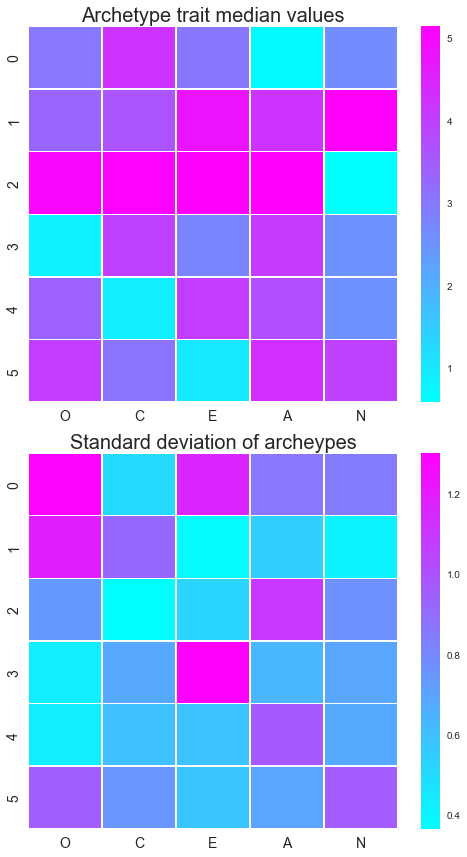

In [51]:
plt.figure(figsize=(7,12))

plt.subplot(2,1,1)
plt.title("Archetype trait median values", fontsize=20)
sns.heatmap(df_median, annot=False, cmap="cool")
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

plt.subplot(2,1,2)
plt.title("Standard deviation of archeypes", fontsize=20)
sns.heatmap(df_std, annot=False, cmap="cool")
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

plt.tight_layout()

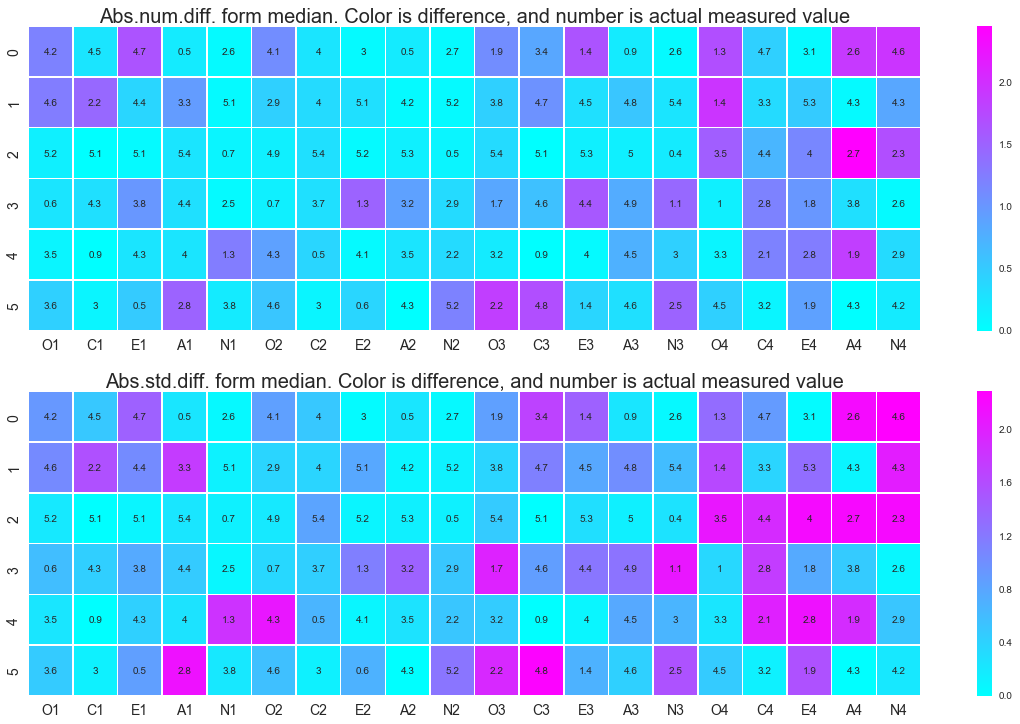

In [31]:
plt.figure(figsize=(20,12))

plt.subplot(2,1,1)
plt.title("Abs.num.diff. form median. Color is difference, and number is actual measured value", fontsize=20)
sns.heatmap(data=df_main_diff_from_median, annot=False, cmap="cool")
sns.heatmap(data=df_main, annot=True, alpha=0.0, cbar=False, cmap="Pastel1")
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

plt.subplot(2,1,2)
plt.title("Abs.std.diff. form median. Color is difference, and number is actual measured value", fontsize=20)
sns.heatmap(data=df_main_std_diff_from_median, annot=False, cmap="cool")
sns.heatmap(data=df_main, annot=True, alpha=0.0, cbar=False, cmap="Pastel1")
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

plt.show()